<a href="https://colab.research.google.com/github/HYUNSOOLEE-6839/colab-Deep-Learning/blob/main/02_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 손글씨 - Convolutional Neutral Network

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때 마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


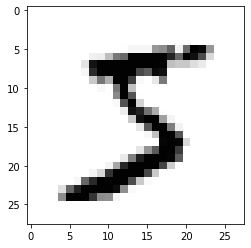

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
X_train = X_train / 255.0
X_train.shape

(60000, 28, 28, 1)

In [7]:
import sys
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%3d ' % i)
  sys.stdout.write('\n')

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [8]:
X_test = X_test / 255.0
type(X_test[0,0])

numpy.ndarray

In [9]:
# 5가 나오기 때문에 One-Hot-Encoding 으로 바꿔주어야함.
Y_class_train[0]

5

In [10]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### 모델 정의, 설정, 학습

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D

In [12]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               18874880  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

### 모델 저장조건 설정

In [15]:
modelpath = MODEL_DIR + 'best{epoch:03d}-{val_loss:.4f}.hdf5'
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델이 한 번 돌 때마다 어떠한 행동을 수행하는 것
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### 모델 실행

In [16]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.05046, saving model to ./model/best001-0.0505.hdf5

Epoch 00002: val_loss did not improve from 0.05046

Epoch 00003: val_loss improved from 0.05046 to 0.04536, saving model to ./model/best003-0.0454.hdf5

Epoch 00004: val_loss did not improve from 0.04536

Epoch 00005: val_loss did not improve from 0.04536

Epoch 00006: val_loss did not improve from 0.04536

Epoch 00007: val_loss did not improve from 0.04536

Epoch 00008: val_loss did not improve from 0.04536

Epoch 00009: val_loss did not improve from 0.04536

Epoch 00010: val_loss did not improve from 0.04536

Epoch 00011: val_loss did not improve from 0.04536

Epoch 00012: val_loss did not improve from 0.04536

Epoch 00013: val_loss did not improve from 0.04536


In [17]:
from tensorflow.keras.models import load_model

best_model = load_model('./model/best003-0.0454.hdf5')
acc = best_model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"\n Test Accuracy:{acc:.4f}")

313/313 - 1s - loss: 0.0343 - accuracy: 0.9886

 Test Accuracy:0.9886


### 훈련과정 시각화

In [18]:
# 검증셋의 오차
# y_loss에 테스트셋으로 실험 결과의 오차 값을 저장
y_loss=history.history['loss']
# y_loss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

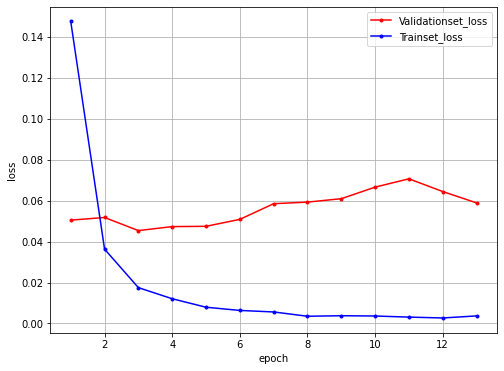

In [19]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker=".", c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()